## Error Analysis and Visualisation for XGBoost Models

### Check running python kernel

In [1]:
!which python

/home/wikilimo/miniconda3/envs/smos-agb/bin/python


### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.metrics import r2_score

### Top Level Constants

In [3]:
drop_columns = ['lon', 'lat', 'APE']
HIGH_THRESHOLD = 1e10
model = 'catboost/5_3_wBoxCox'
model_type = 'midlats'

### Inference Files

In [4]:
FILE_PATHS = os.path.join(model, '*'+model_type+'*.csv')
FILE_NAMES = glob.glob(FILE_PATHS)
print(FILE_NAMES)

['/home/wikilimo/inference_analysis_ml/catboost/5_3_wBoxCox/midlats_output_Aug.csv', '/home/wikilimo/inference_analysis_ml/catboost/5_3_wBoxCox/midlats_output_Nov.csv', '/home/wikilimo/inference_analysis_ml/catboost/5_3_wBoxCox/midlats_output_July.csv', '/home/wikilimo/inference_analysis_ml/catboost/5_3_wBoxCox/midlats_output_Oct.csv', '/home/wikilimo/inference_analysis_ml/catboost/5_3_wBoxCox/midlats_output_Dec.csv', '/home/wikilimo/inference_analysis_ml/catboost/5_3_wBoxCox/midlats_output_Sept.csv']


### Make Dataframe

In [5]:
fli_df = pd.concat((pd.read_csv(f, index_col=False).reset_index(drop=True) for f in FILE_NAMES), ignore_index=True)

In [6]:
fli_df

,lon,lat,predicted_load,actual_load,APE
0,-65.125,-42.125,8.897045e+08,3.144944e+08,182.899935
1,-63.875,-40.375,1.043178e+09,1.134987e+08,819.110541
2,-63.625,-40.375,3.648960e+08,1.428522e+07,2454.361539
3,-63.375,-40.375,3.440121e+07,1.091883e+07,215.063074
4,-64.125,-40.125,2.148641e+09,8.606542e+08,149.652022
...,...,...,...,...,...
3199,75.625,66.625,3.959808e+08,3.478482e+08,13.837242
3200,75.875,66.625,1.360365e+08,1.281838e+08,6.126124
3201,76.875,66.875,2.355508e+08,1.696970e+08,38.806757
3202,77.125,66.875,2.005780e+08,1.226333e+08,63.559151


### Stats

In [7]:
actual_mean = fli_df['actual_load'].mean()
actual_median = fli_df['actual_load'].median()
print("Actual Fuel Load mean - {actual_mean} and median - {actual_median}".format(actual_mean = actual_mean, actual_median = actual_median))

Actual Fuel Load mean - 1304713639.637123 and median - 285220578.0800991


In [8]:
Predicted_mean = fli_df['predicted_load'].mean()
Predicted_median = fli_df['predicted_load'].median()
print("Predicted Fuel Load mean - {Predicted_mean} and median - {Predicted_median}".format(Predicted_mean = Predicted_mean, Predicted_median = Predicted_median))

Predicted Fuel Load mean - 1681199266.6992755 and median - 388343687.50070643


### $R^2$ Score 
More details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [9]:
r2_score(fli_df['actual_load'], fli_df['predicted_load'])

0.7091235371201627

### General Trend of Actual and Predicted Values

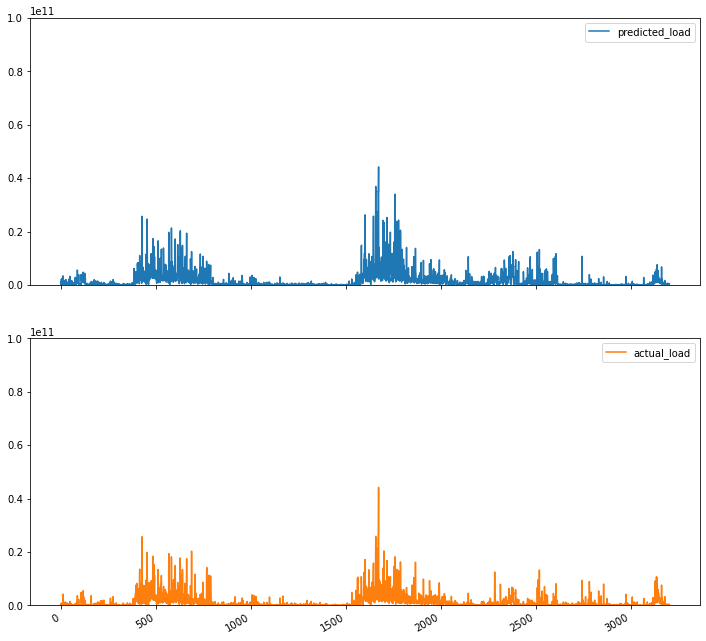

In [10]:
axes = fli_df.drop(columns=drop_columns).plot(subplots = True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 1e11)

### Distribution of high values (> HIGH_THRESHOLD)

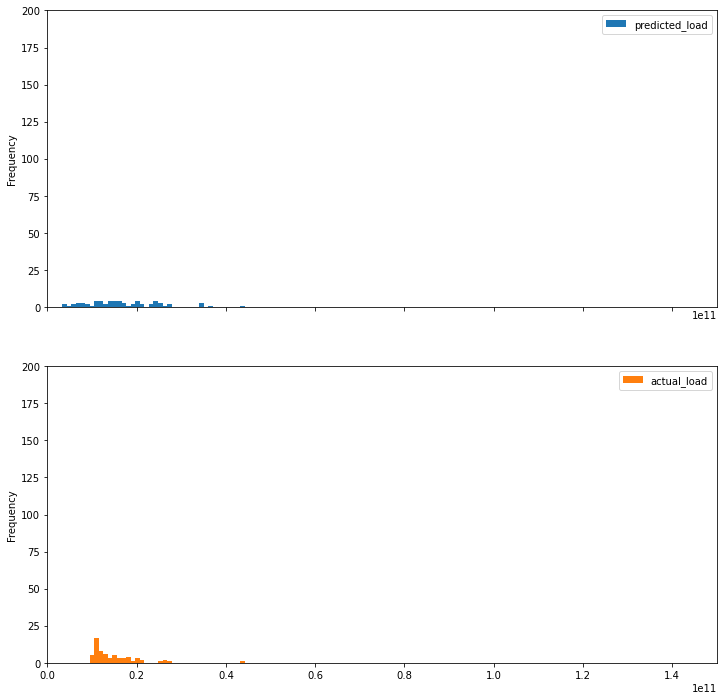

In [11]:
fli_df_high = fli_df[fli_df['actual_load'] >= HIGH_THRESHOLD].reset_index(drop=True)
axes = fli_df_high.drop(columns=drop_columns).plot.hist(bins=40, subplots=True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 200)
    ax.set_xlim(0, 1.5e11)

### Distribution of Errors

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

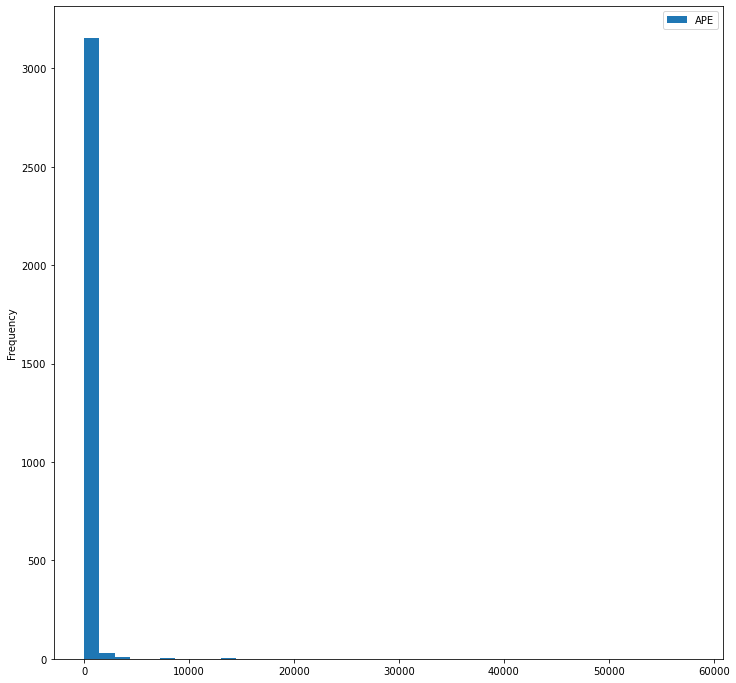

In [12]:
fli_err = fli_df.drop(columns=['lat', 'lon', 'predicted_load', 'actual_load'])
fli_err.plot.hist(bins=40, subplots=True, figsize=(12, 12))

### Error Stats

In [13]:
fli_err.max()

APE    58006.752431
dtype: float64

In [14]:
fli_err.mean()

APE    210.722742
dtype: float64

In [15]:
fli_err.median()

APE    51.264764
dtype: float64